In [29]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import pandas_datareader as pdr
from pandas_datareader import data as wb

In [30]:
import yfinance as yf
PG = yf.Ticker('PG')


In [31]:
PG_data = PG.history(start = '2017-1-1')

In [32]:
PG_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-01-03 00:00:00-05:00,68.791829,69.210093,68.480185,69.054268,8792700,0.0,0.0
2017-01-04 00:00:00-05:00,69.259307,69.382327,69.087082,69.300316,8096700,0.0,0.0
2017-01-05 00:00:00-05:00,69.226501,70.063022,69.201892,69.759575,6852400,0.0,0.0
2017-01-06 00:00:00-05:00,69.661147,69.915383,69.398708,69.734955,4799900,0.0,0.0
2017-01-09 00:00:00-05:00,68.939440,69.431518,68.685204,69.218285,11000600,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-22 00:00:00-05:00,146.970001,148.210007,146.279999,147.860001,11084100,0.0,0.0
2024-01-23 00:00:00-05:00,153.110001,156.399994,152.889999,153.979996,19101600,0.0,0.0
2024-01-24 00:00:00-05:00,153.929993,154.229996,152.089996,152.119995,11592700,0.0,0.0


In [33]:
PG_data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-01-22 00:00:00-05:00,146.970001,148.210007,146.279999,147.860001,11084100,0.0,0.0
2024-01-23 00:00:00-05:00,153.110001,156.399994,152.889999,153.979996,19101600,0.0,0.0
2024-01-24 00:00:00-05:00,153.929993,154.229996,152.089996,152.119995,11592700,0.0,0.0
2024-01-25 00:00:00-05:00,152.399994,155.660004,152.059998,155.619995,10352500,0.0,0.0
2024-01-26 00:00:00-05:00,155.809998,156.160004,155.339996,156.139999,8356600,0.0,0.0


In [34]:
PG_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-01-03 00:00:00-05:00,68.791829,69.210093,68.480185,69.054268,8792700,0.0,0.0
2017-01-04 00:00:00-05:00,69.259307,69.382327,69.087082,69.300316,8096700,0.0,0.0
2017-01-05 00:00:00-05:00,69.226501,70.063022,69.201892,69.759575,6852400,0.0,0.0
2017-01-06 00:00:00-05:00,69.661147,69.915383,69.398708,69.734955,4799900,0.0,0.0
2017-01-09 00:00:00-05:00,68.939440,69.431518,68.685204,69.218285,11000600,0.0,0.0


In [35]:
PG_data['simple_return']= (PG_data['Close']/PG_data['Close'].shift(1))-1 #Calculating the rate of return on the daily for PG

In [36]:
PG_data['simple_return']

Date
2017-01-03 00:00:00-05:00         NaN
2017-01-04 00:00:00-05:00    0.003563
2017-01-05 00:00:00-05:00    0.006627
2017-01-06 00:00:00-05:00   -0.000353
2017-01-09 00:00:00-05:00   -0.007409
                               ...   
2024-01-22 00:00:00-05:00    0.001965
2024-01-23 00:00:00-05:00    0.041390
2024-01-24 00:00:00-05:00   -0.012079
2024-01-25 00:00:00-05:00    0.023008
2024-01-26 00:00:00-05:00    0.003342
Name: simple_return, Length: 1778, dtype: float64

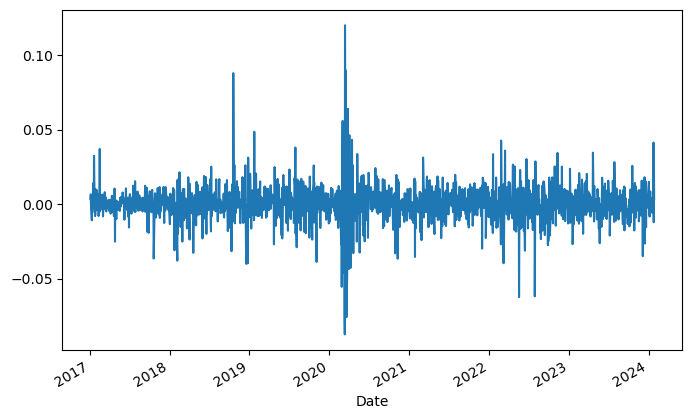

In [37]:
PG_data['simple_return'].plot(figsize = (8,5)) # plot the simple_return column on a graph sized 8,5
plt.show()                               

In [38]:
avg_returns_d = PG_data['simple_return'].mean() #Calculating the average returns per day 
avg_returns_d

0.0005364578012198894

In [39]:
avg_returns_y = str(round(avg_returns_d*250,5)*100) + " %" #there about 250-252 trading days per year so multiplying by 250 to get yearly Avg return rate
avg_returns_y

'13.411000000000001 %'

In [40]:
PG_data['log_return'] = np.log(PG_data["Close"])/PG_data['Close'].shift(1) #Calculating daily Log return

In [41]:
PG_data['log_return']

Date
2017-01-03 00:00:00-05:00         NaN
2017-01-04 00:00:00-05:00    0.061379
2017-01-05 00:00:00-05:00    0.061256
2017-01-06 00:00:00-05:00    0.060848
2017-01-09 00:00:00-05:00    0.060762
                               ...   
2024-01-22 00:00:00-05:00    0.033857
2024-01-23 00:00:00-05:00    0.034065
2024-01-24 00:00:00-05:00    0.032632
2024-01-25 00:00:00-05:00    0.033180
2024-01-26 00:00:00-05:00    0.032456
Name: log_return, Length: 1778, dtype: float64

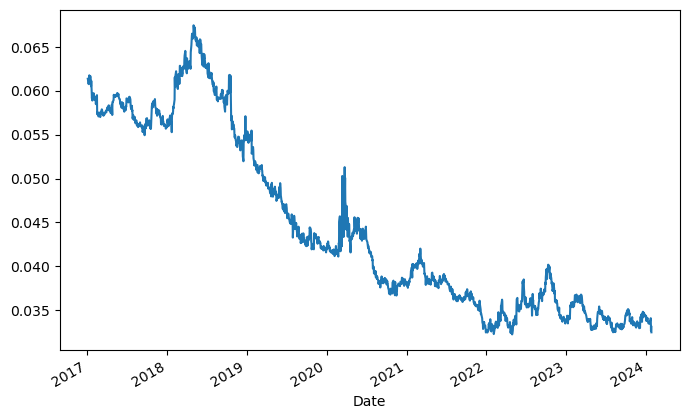

In [42]:
PG_data['log_return'].plot(figsize = (8,5)) # plot the simple_return column on a graph sized 8,5
plt.show()

In [43]:
log_return_d = PG_data['log_return'].mean() #Calculating the average log returns per day
log_return_d

0.04455677223101699

In [44]:
log_return_y = str(round(log_return_d,5)*250) + "%" #there about 250-252 trading days per year so multiplying by 250 to get yearly Avg lo return rate
log_return_y

'11.14%'

In [45]:
#RATE OF RETURN OF OF A PORTFOLIO OF SECURITIES

In [46]:
tickers = ['PG','MSFT','F','GE']
mydata = pd.DataFrame() # creating a dataframe for my Portfolio of returns. 
    

In [47]:
for t in tickers:
    data=yf.Ticker(t)
    mydata[t]= data.history(start = '2017-03-17')['Close'] #filling the dataframe with close data
    

In [20]:
mydata

,PG,MSFT,F,GE


In [21]:
mydata.head

<bound method NDFrame.head of Empty DataFrame
Columns: [PG, MSFT, F, GE]
Index: []>

In [22]:
mydata.tail

<bound method NDFrame.tail of Empty DataFrame
Columns: [PG, MSFT, F, GE]
Index: []>

In [23]:
mydata.iloc[0] #gives the 1st row of data in the dataframe

IndexError: single positional indexer is out-of-bounds

In [ ]:
(mydata/mydata.iloc[0]*100).plot(figsize=(15,6))

In [ ]:
returns = (mydata/mydata.shift(1)) - 1
returns

In [ ]:
weight = np.array([0.25,0.25,0.25,0.25]) 

In [ ]:
np.dot(returns,weight) # Average rate of return

In [ ]:
annual_returns = returns.mean()*250

In [ ]:
pfolio_1 = str(round(np.dot(annual_returns,weight),5)*100)+'%'

In [ ]:
pfolio_1

In [ ]:
weight_2 = np.array([0.4,0.4,0.15,0.05])

In [ ]:
pfolio_2 = str(round(np.dot(annual_returns,weight_2),5)*100)+'%'

print(pfolio_1)
print(pfolio_2)

In [ ]:
itickers = ['^GSPC','^IXIC','^GDAXI','^FTSE']
ind_data = pd.DataFrame()

for t in itickers:
    ind_data[t] = data.history(start = '1997-01-01')['Close'] #filling the dataframe with close data
    
    

In [ ]:
ind_data

In [ ]:
 (ind_data/ind_data.iloc[0]).plot(figsize =(15,6))